In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
import os
print("current Dir", os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir, "datasets", "Train")
test_path = os.path.join(curr_dir, "datasets", "Test")
valid_path = os.path.join(curr_dir, "datasets", "Valid")


current Dir c:\Users\ashok\OneDrive\Desktop\Potato-Project


In [4]:
training_set = tf.keras.utils.image_dataset_from_directory (
    train_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128, 128),
    shuffle = True,
    interpolation = "bilinear",
)

Found 900 files belonging to 3 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory (
    valid_path,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    image_size = (128, 128),
    shuffle = True,
    interpolation = "bilinear",
)

Found 300 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\ashok\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']
)

In [8]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.3126 - loss: 1.7987 - val_accuracy: 0.5333 - val_loss: 1.0453
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.4873 - loss: 1.0079 - val_accuracy: 0.5333 - val_loss: 0.9274
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.6436 - loss: 0.7564 - val_accuracy: 0.7767 - val_loss: 0.4767
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8039 - loss: 0.4827 - val_accuracy: 0.7733 - val_loss: 0.4823
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7952 - loss: 0.4577 - val_accuracy: 0.9067 - val_loss: 0.2303
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8655 - loss: 0.3074 - val_accuracy: 0.9133 - val_loss: 0.2393
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9081 - loss: 0.2165 - val_accuracy: 0.9367 - val_loss: 0.1637
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 949ms/step - accuracy: 0.9234 - loss: 0.1923 - val_accuracy: 0.9333 - val_lo

In [10]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 383ms/step - accuracy: 0.9442 - loss: 0.1061
Training accuracy: 0.9611111283302307


In [11]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 315ms/step - accuracy: 0.9292 - loss: 0.1870
Validation accuracy: 0.9366666674613953


In [12]:
cnn.save('trained_plant_disease_model.keras')

In [13]:
training_history.history

{'accuracy': [0.34333333373069763,
  0.4955555498600006,
  0.6811110973358154,
  0.8177777528762817,
  0.8133333325386047,
  0.8733333349227905,
  0.9166666865348816,
  0.9288889169692993,
  0.9511111378669739,
  0.95333331823349],
 'loss': [1.3865364789962769,
  0.9914368391036987,
  0.6851316094398499,
  0.4357810914516449,
  0.4085944890975952,
  0.2868354916572571,
  0.21497541666030884,
  0.18787001073360443,
  0.14529255032539368,
  0.11390082538127899],
 'val_accuracy': [0.5333333611488342,
  0.5333333611488342,
  0.7766666412353516,
  0.7733333110809326,
  0.9066666960716248,
  0.9133333563804626,
  0.9366666674613953,
  0.9333333373069763,
  0.9599999785423279,
  0.9366666674613953],
 'val_loss': [1.0452884435653687,
  0.9274170994758606,
  0.47666260600090027,
  0.482345849275589,
  0.23025980591773987,
  0.23928166925907135,
  0.16368894279003143,
  0.15638528764247894,
  0.11946550756692886,
  0.17346303164958954]}

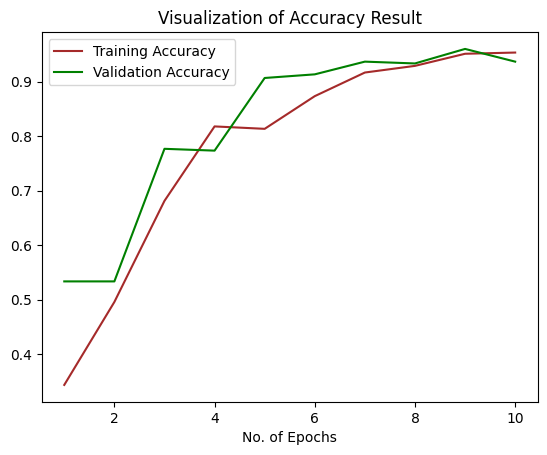

In [37]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [17]:
class_name = validation_set.class_names

In [21]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'datasets/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [22]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [23]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

In [ ]:
<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [ ]:
predicted_categories

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm = confusion_matrix(Y_true,predicted_categories)

In [31]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.99      0.88      0.93       100
 Potato___Late_blight       0.89      0.93      0.91       100
     Potato___healthy       0.94      1.00      0.97       100

             accuracy                           0.94       300
            macro avg       0.94      0.94      0.94       300
         weighted avg       0.94      0.94      0.94       300



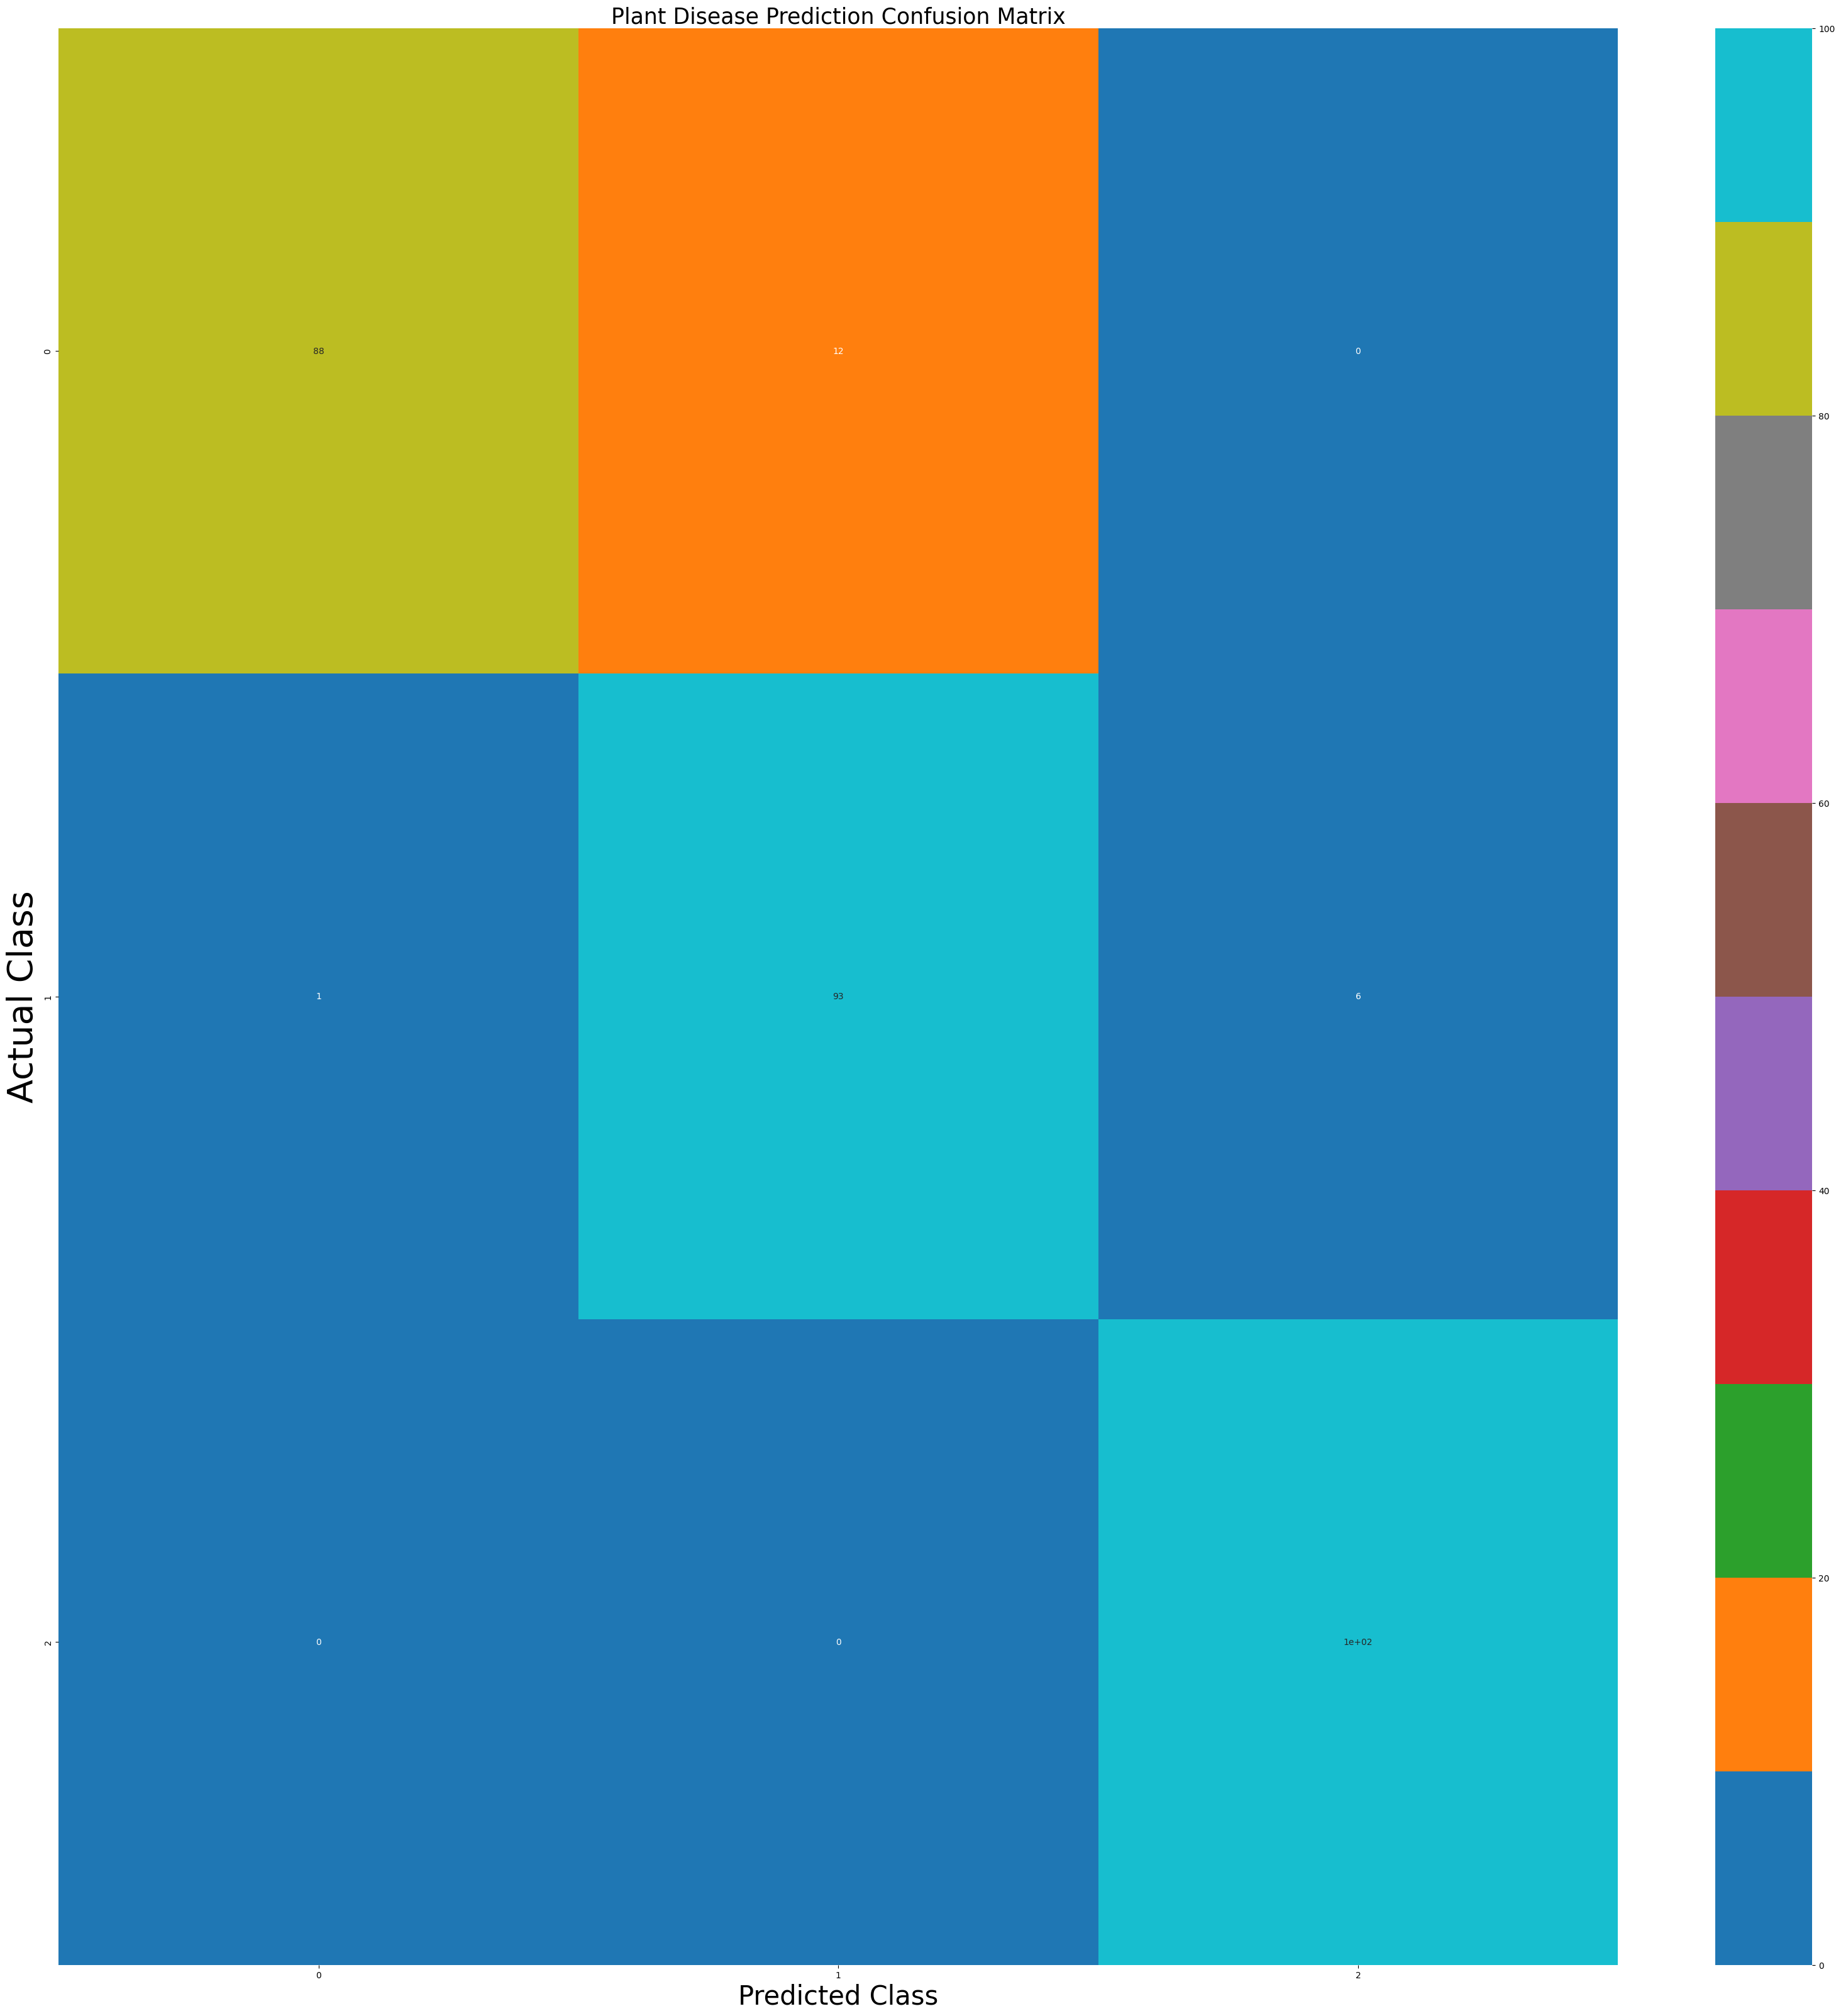

In [35]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10}, cmap='tab10')

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()